In [1]:
import pandas as pd
df = pd.read_csv('P1training.csv', parse_dates=True, index_col=0)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9
2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,45.730000,...,18.1,48.590000,17.000000,45.29,6.02,734.0,92.0,5.333333,43.833333,4.8


In [2]:
#get list of predictor names
feat_cols = [col for col in df.columns if 'Appliances' not in col]

#dimensions
d = df.shape

#numper of instances
n = df.shape[0]

#number of input variables for regression
p = df.shape[1] - 1

print('We have n={} rows, {} columns, of which p={} explanatory variables'.format(n, d[1], p))

We have n=14803 rows, 26 columns, of which p=25 explanatory variables


In [3]:
#list of variables and their types
print(df.dtypes)

Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
dtype: object


In [4]:
# launching analysis
# regression using formula
import statsmodels.formula.api as smf

#instantiate model
model = smf.ols('Appliances ~ 1 + {}'.format(' + '.join(feat_cols)), data=df)

#fit the model
results = model.fit()

#detailed results
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     120.5
Date:                Sat, 15 Sep 2018   Prob (F-statistic):               0.00
Time:                        01:13:18   Log-Likelihood:                -88213.
No. Observations:               14803   AIC:                         1.765e+05
Df Residuals:                   14777   BIC:                         1.767e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      14.5575    108.938      0.134      0.894    -198.975     228.090
lights          1.9421      0.110     17.626      0.000       1.726       2.158
T1             -2.4001      2.129     -1.127      0.260      -6.573       1.773
RH_1           15.1371      0.774     19.570      0.000      13.621      16.653
T2            -17.5290      1.890     -9.276      0.000     -21.233     -13.825
RH_2          -13.8282      0.885    -15.626      0.000     -15.563     -12.094
T3             27.0518      1.213     22.303      0.000      24.674      29.429
RH_3            5.4795      0.780      7.024      0.000       3.950       7.009
T4             -2.8481      1.177     -2.419      0.016      -5.156      -0.540
RH_4           -0.2031      0.738     -0.275      0.783      -1.651       1.244
T5             -1.1008      1.355     -0.812      0.417      -3.757       1.555
RH_5            0.1752      0.100      1.749      0.080      -0.021       0.372
T6              6.9540      0.730      9.532      0.000       5.524       8.384
RH_6            0.3310      0.078      4.234      0.000       0.178       0.484
T7              1.9370      1.518      1.276      0.202      -1.039       4.913
RH_7           -1.7845      0.497     -3.589      0.000      -2.759      -0.810
T8              8.8928      1.109      8.021      0.000       6.720      11.066
RH_8           -4.5695      0.431    -10.611      0.000      -5.414      -3.725
T9            -15.9222      2.032     -7.835      0.000     -19.905     -11.939
RH_9           -1.0635      0.475     -2.238      0.025      -1.995      -0.132
T_out         -10.2633      1.751     -5.863      0.000     -13.695      -6.832
Press_mm_hg     0.1787      0.123      1.452      0.147      -0.063       0.420
RH_out         -1.1233      0.362     -3.103      0.002      -1.833      -0.414
Windspeed       1.7534      0.400      4.383      0.000       0.969       2.538
Visibility      0.1342      0.067      2.015      0.044       0.004       0.265
Tdewpoint       5.4279      1.701      3.190      0.001       2.093       8.763
==============================================================================
Omnibus:                    10278.405   Durbin-Watson:                   0.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146282.997
Skew:                           3.254   Prob(JB):                         0.00
Kurtosis:                      16.957   Cond. No.                     1.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
pvalues = results.pvalues
print('pvalues {}\n'.format(pvalues))
p_dict = pvalues.to_dict()
pvalue_threshold = 0.05
for key, value in p_dict.items():
    if value >= pvalue_threshold:
        print('keys to remove',key)
        if key == 'Intercept':
            continue
        else:
            print('removing...')
            feat_cols.remove(key)
print(feat_cols)

pvalues Intercept       8.936960e-01
lights          7.871849e-69
T1              2.596363e-01
RH_1            3.264600e-84
T2              2.000997e-20
RH_2            1.332600e-54
T3             2.090622e-108
RH_3            2.253703e-12
T4              1.557741e-02
RH_4            7.832838e-01
T5              4.165326e-01
RH_5            8.035544e-02
T6              1.779162e-21
RH_6            2.306854e-05
T7              2.020236e-01
RH_7            3.326504e-04
T8              1.125436e-15
RH_8            3.277556e-26
T9              4.999627e-15
RH_9            2.524689e-02
T_out           4.645179e-09
Press_mm_hg     1.465400e-01
RH_out          1.921976e-03
Windspeed       1.177773e-05
Visibility      4.388706e-02
Tdewpoint       1.423643e-03
dtype: float64

keys to remove Intercept
keys to remove T1
removing...
keys to remove RH_4
removing...
keys to remove T5
removing...
keys to remove RH_5
removing...
keys to remove T7
removing...
keys to remove Press_mm_hg
removing...
['li

In [6]:
#run model again after removing variables that are not significant at 5% level
#instantiate model
model = smf.ols('Appliances ~ 1 + {}'.format(' + '.join(feat_cols)), data=df)

#fit the model
results = model.fit()

#detailed results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     158.1
Date:                Sat, 15 Sep 2018   Prob (F-statistic):               0.00
Time:                        01:13:18   Log-Likelihood:                -88218.
No. Observations:               14803   AIC:                         1.765e+05
Df Residuals:                   14783   BIC:                         1.766e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    168.3227     40.212      4.186      0.000      89.501     247.144
lights         1.9380      0.109     17.855      0.000       1.725       2.151
RH_1          15.5188      0.675     22.986      0.000      14.195      16.842
T2           -19.2187      1.300    -14.784      0.000     -21.767     -16.671
RH_2         -14.4354      0.748    -19.311      0.000     -15.901     -12.970
T3            26.0964      1.083     24.093      0.000      23.973      28.220
RH_3           5.4649      0.762      7.173      0.000       3.972       6.958
T4            -2.6331      1.054     -2.498      0.012      -4.699      -0.567
T6             7.0230      0.686     10.235      0.000       5.678       8.368
RH_6           0.3015      0.076      3.950      0.000       0.152       0.451
RH_7          -1.6594      0.439     -3.776      0.000      -2.521      -0.798
T8             8.8929      0.938      9.476      0.000       7.053      10.732
RH_8          -4.6926      0.396    -11.849      0.000      -5.469      -3.916
T9           -15.2532      1.514    -10.073      0.000     -18.221     -12.285
RH_9          -0.8454      0.447     -1.891      0.059      -1.722       0.031
T_out        -10.7078      1.709     -6.266      0.000     -14.058      -7.358
RH_out        -1.2259      0.358     -3.421      0.001      -1.928      -0.523
Windspeed      1.5257      0.382      3.990      0.000       0.776       2.275
Visibility     0.1313      0.066      1.978      0.048       0.001       0.261
Tdewpoint      5.7377      1.668      3.439      0.001       2.468       9.008
==============================================================================
Omnibus:                    10280.110   Durbin-Watson:                   0.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146417.356
Skew:                           3.255   Prob(JB):                         0.00
Kurtosis:                      16.965   Cond. No.                     7.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
pvalues = results.pvalues
print('pvalues {}\n'.format(pvalues))
p_dict = pvalues.to_dict()
pvalue_threshold = 0.05
for key, value in p_dict.items():
    if value >= pvalue_threshold:
        print('keys to remove',key)
        if key == 'Intercept':
            continue
        else:
            print('removing...')
            feat_cols.remove(key)
print(feat_cols)

pvalues Intercept      2.857692e-05
lights         1.455071e-70
RH_1          6.584380e-115
T2             4.193713e-49
RH_2           4.419711e-82
T3            7.834013e-126
RH_3           7.687058e-13
T4             1.249592e-02
T6             1.664180e-24
RH_6           7.858909e-05
RH_7           1.598563e-04
T8             3.025767e-21
RH_8           3.053734e-32
T9             8.714526e-24
RH_9           5.859732e-02
T_out          3.814118e-10
RH_out         6.262084e-04
Windspeed      6.646242e-05
Visibility     4.792490e-02
Tdewpoint      5.849967e-04
dtype: float64

keys to remove RH_9
removing...
['lights', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T6', 'RH_6', 'RH_7', 'T8', 'RH_8', 'T9', 'T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']


In [8]:
#run model again after removing variables that are not significant at 5% level
#instantiate model
model = smf.ols('Appliances ~ 1 + {}'.format(' + '.join(feat_cols)), data=df)

#fit the model
results = model.fit()

#detailed results
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     166.7
Date:                Sat, 15 Sep 2018   Prob (F-statistic):               0.00
Time:                        01:13:18   Log-Likelihood:                -88220.
No. Observations:               14803   AIC:                         1.765e+05
Df Residuals:                   14784   BIC:                         1.766e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    167.2516     40.212      4.159      0.000      88.431     246.072
lights         1.9508      0.108     18.006      0.000       1.738       2.163
RH_1          15.6224      0.673     23.214      0.000      14.303      16.942
T2           -19.2343      1.300    -14.795      0.000     -21.783     -16.686
RH_2         -14.5382      0.746    -19.499      0.000     -16.000     -13.077
T3            25.9693      1.081     24.020      0.000      23.850      28.089
RH_3           5.0879      0.735      6.919      0.000       3.646       6.529
T4            -2.4114      1.048     -2.302      0.021      -4.465      -0.358
T6             6.9699      0.686     10.166      0.000       5.626       8.314
RH_6           0.2830      0.076      3.738      0.000       0.135       0.431
RH_7          -1.8021      0.433     -4.162      0.000      -2.651      -0.953
T8             9.1379      0.930      9.831      0.000       7.316      10.960
RH_8          -4.9258      0.376    -13.087      0.000      -5.664      -4.188
T9           -15.8146      1.485    -10.649      0.000     -18.726     -12.904
T_out        -10.7155      1.709     -6.270      0.000     -14.066      -7.365
RH_out        -1.2099      0.358     -3.377      0.001      -1.912      -0.508
Windspeed      1.4983      0.382      3.921      0.000       0.749       2.247
Visibility     0.1303      0.066      1.963      0.050       0.000       0.260
Tdewpoint      5.7838      1.668      3.467      0.001       2.514       9.054
==============================================================================
Omnibus:                    10265.229   Durbin-Watson:                   0.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145745.299
Skew:                           3.249   Prob(JB):                         0.00
Kurtosis:                      16.931   Cond. No.                     7.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
pvalues = results.pvalues
print('pvalues {}\n'.format(pvalues))
p_dict = pvalues.to_dict()
pvalue_threshold = 0.05
for key, value in p_dict.items():
    if value >= pvalue_threshold:
        print('keys to remove',key)
        if key == 'Intercept':
            continue
        else:
            print('removing...')
            feat_cols.remove(key)
print(feat_cols)

pvalues Intercept      3.211039e-05
lights         1.013643e-71
RH_1          4.055148e-117
T2             3.568334e-49
RH_2           1.258109e-83
T3            4.271912e-125
RH_3           4.750611e-12
T4             2.135602e-02
T6             3.394591e-24
RH_6           1.862068e-04
RH_7           3.167049e-05
T8             9.758333e-23
RH_8           6.418439e-39
T9             2.196326e-26
T_out          3.717911e-10
RH_out         7.352675e-04
Windspeed      8.871149e-05
Visibility     4.964819e-02
Tdewpoint      5.279506e-04
dtype: float64

['lights', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T6', 'RH_6', 'RH_7', 'T8', 'RH_8', 'T9', 'T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']


In [10]:
#estimated coefficients 
print(results.params) 

#R2 
print(results.rsquared) 

#calculating the F-statistic 
F = results.mse_model / results.mse_resid 
print(F) 

#F provided by the results object 
print(results.fvalue)

Intercept     167.251622
lights          1.950824
RH_1           15.622400
T2            -19.234316
RH_2          -14.538242
T3             25.969282
RH_3            5.087867
T4             -2.411399
T6              6.969909
RH_6            0.283027
RH_7           -1.802129
T8              9.137875
RH_8           -4.925785
T9            -15.814629
T_out         -10.715500
RH_out         -1.209942
Windspeed       1.498332
Visibility      0.130310
Tdewpoint       5.783823
dtype: float64
0.16870778634054384
166.6866671400471
166.6866671400471


In [11]:
#This test checks if the observed skewness and kurtosis matching a normal distribution. 
#Jarque-Bera normality test
#a large J-B value indicates that errors are not normally distributed
#Samples from a normal distribution have an expected skewness of 0 
#and an expected excess kurtosis of 0 (which is the same as a kurtosis of 3)
import statsmodels.api as sm
JB, JBpv, skw, kurt = sm.stats.stattools.jarque_bera(results.resid)
print('JB:',JB)
print('JBpv:',JBpv)
print('Skewness:',skw)
print('Kurtosis:',kurt)

JB: 145745.29913634626
JBpv: 0.0
Skewness: 3.2491883587270327
Kurtosis: 16.930790737204266


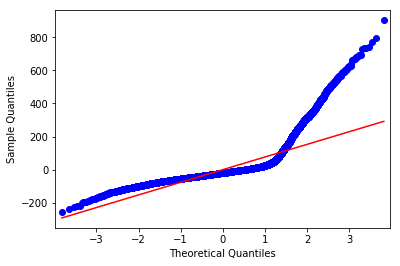

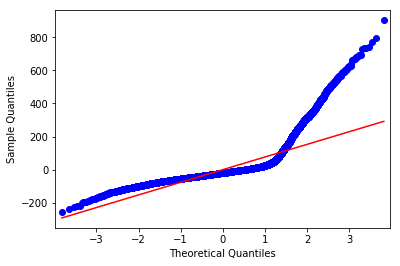

In [12]:
#Normal probability plot. 
#The normal probability plot is a graphical technique to identify substantive departures from normality. 
#It is based on the comparison between the observed distribution 
#and the theoretical distribution under the normal assumption. 
#The null hypothesis (normal distribution) is rejected if the points are not aligned on a straight line. 
#We use the qqplot() procedure.
import scipy.stats as stats
#qqpolot vs. normal distribution 
sm.qqplot(results.resid, stats.distributions.norm, line='r')

In [13]:
#Detection of outliers and influential points
influence = results.get_influence()

#determine leverage
print(influence.hat_matrix_diag)

[0.00197474 0.00177528 0.00170431 ... 0.00122839 0.00148987 0.00179967]


In [14]:
#internally studentized residuals
print(influence.resid_studentized_internal)

[-1.12852123 -0.97108256 -1.0300844  ... -0.31200104  3.15347581
  3.40231305]


In [15]:
#checking the values of the internally studentized residuals
import numpy as np
residus = results.resid.values #residuals
leverages = influence.hat_matrix_diag #leverage
sigma_err = np.sqrt(results.scale) #regression standard error
res_stds = residus/(sigma_err*np.sqrt(1.0-leverages))
print(res_stds)

[-1.12852123 -0.97108256 -1.0300844  ... -0.31200104  3.15347581
  3.40231305]


In [16]:
#checking with the formula
res_studs = res_stds*np.sqrt((n-p-2)/(n-p-1-res_stds**2))
print(res_studs)

[-1.12853167 -0.97108069 -1.03008652 ... -0.31199151  3.1544307
  3.40353128]


In [17]:
#threshold leverage
threshold_leverage = 2*(p+1)/n
print(threshold_leverage)
#identification
atypical_leverage = leverages > threshold_leverage
print(atypical_leverage)

0.003512801459163683
[False False False ... False False False]


In [18]:
#which variables?
print(df.index[atypical_leverage],leverages[atypical_leverage])

DatetimeIndex(['2016-01-11 19:00:00', '2016-01-11 19:10:00',
               '2016-01-11 19:20:00', '2016-01-15 00:40:00',
               '2016-01-15 00:50:00', '2016-01-15 01:00:00',
               '2016-01-15 01:10:00', '2016-01-15 01:40:00',
               '2016-01-15 01:50:00', '2016-01-15 02:00:00',
               ...
               '2016-05-08 19:00:00', '2016-05-08 19:10:00',
               '2016-05-08 19:20:00', '2016-05-08 19:30:00',
               '2016-05-08 19:40:00', '2016-05-08 19:50:00',
               '2016-05-08 20:00:00', '2016-05-08 20:10:00',
               '2016-05-08 20:20:00', '2016-05-08 20:30:00'],
              dtype='datetime64[ns]', name='date', length=177, freq=None) [0.00377023 0.00452752 0.00479745 0.00355455 0.00370782 0.00384588
 0.00384405 0.003753   0.0038572  0.00392975 0.00357683 0.00352391
 0.00404278 0.00356114 0.0036755  0.0048414  0.00352503 0.0035828
 0.0045241  0.00359293 0.0035463  0.00936241 0.01130227 0.0059215
 0.00372049 0.00503385 0.00353

In [19]:
#threshold externally studentized residuals
import scipy
threshold_stud = scipy.stats.t.ppf(0.975,df=n-p-2)
print(threshold_stud)
#detection - absolute value > threshold
atypical_stud = np.abs(res_studs) > threshold_stud
#which ones?
print(df.index[atypical_stud],res_studs[atypical_stud])

1.960124546414792
DatetimeIndex(['2016-01-11 19:00:00', '2016-01-11 22:10:00',
               '2016-01-11 22:20:00', '2016-01-11 22:30:00',
               '2016-01-12 00:40:00', '2016-01-12 01:00:00',
               '2016-01-12 10:20:00', '2016-01-12 12:40:00',
               '2016-01-12 14:30:00', '2016-01-12 17:40:00',
               ...
               '2016-05-26 17:00:00', '2016-05-26 17:20:00',
               '2016-05-26 17:30:00', '2016-05-27 08:00:00',
               '2016-05-27 09:40:00', '2016-05-27 09:50:00',
               '2016-05-27 11:20:00', '2016-05-27 11:30:00',
               '2016-05-27 17:50:00', '2016-05-27 18:00:00'],
              dtype='datetime64[ns]', name='date', length=804, freq=None) [ 2.4377758   3.1445298   3.1434548   2.8480097   2.63252338  3.17999696
  3.56049522  3.10466212  2.94049798  2.14237799  2.41986631  2.64720952
  3.14614323  2.80878788  2.36073149  3.35425773  2.39858887  3.15367593
  2.61013335  2.20538727  2.52384491  3.12262019  3.1702226

In [20]:
#Combination of leverage and externally studentized residuals
#suspicious observations with one of the two criteria
pbm_infl = np.logical_or(atypical_leverage,atypical_stud)
print(df.index[pbm_infl])

DatetimeIndex(['2016-01-11 19:00:00', '2016-01-11 19:10:00',
               '2016-01-11 19:20:00', '2016-01-11 22:10:00',
               '2016-01-11 22:20:00', '2016-01-11 22:30:00',
               '2016-01-12 00:40:00', '2016-01-12 01:00:00',
               '2016-01-12 10:20:00', '2016-01-12 12:40:00',
               ...
               '2016-05-26 17:00:00', '2016-05-26 17:20:00',
               '2016-05-26 17:30:00', '2016-05-27 08:00:00',
               '2016-05-27 09:40:00', '2016-05-27 09:50:00',
               '2016-05-27 11:20:00', '2016-05-27 11:30:00',
               '2016-05-27 17:50:00', '2016-05-27 18:00:00'],
              dtype='datetime64[ns]', name='date', length=963, freq=None)


In [21]:
#Multi-collinearity problem
#correlation matrix 
import scipy
df_exog = df[feat_cols]
mc = scipy.corrcoef(df_exog,rowvar=0) 
print(mc)
# Correlation matrix. 
# A rule of thumb is to compare the absolute value of the correlation between 
# each pair of variables with the threshold value 0.8.

[[ 1.00000000e+00  1.12601968e-01 -1.15205963e-02  5.93352307e-02
  -9.90094445e-02  1.35162088e-01 -9.67592736e-03 -7.74454615e-02
   1.57162567e-01  3.59297777e-02 -7.42994894e-02  1.60947297e-02
  -1.59601615e-01 -7.24748289e-02  7.03848322e-02  6.33410753e-02
   1.57856306e-02 -3.23280505e-02]
 [ 1.12601968e-01  1.00000000e+00  2.73211770e-01  7.98149215e-01
   2.57264323e-01  8.45260810e-01  1.10630275e-01  3.18305646e-01
   2.42960821e-01  8.01206555e-01 -2.74822985e-02  7.36267593e-01
   1.17897212e-01  3.42616748e-01  2.74695805e-01  2.03708580e-01
  -1.41010482e-02  6.41864869e-01]
 [-1.15205963e-02  2.73211770e-01  1.00000000e+00 -1.60643431e-01
   7.36324528e-01  1.23497918e-01  7.63696340e-01  8.02254482e-01
  -5.80159961e-01  2.32093753e-01  5.78064414e-01  7.06487188e-02
   6.77350353e-01  7.93606358e-01 -5.03848846e-01  5.09004939e-02
  -7.01016489e-02  5.84015972e-01]
 [ 5.93352307e-02  7.98149215e-01 -1.60643431e-01  1.00000000e+00
   1.41735392e-01  6.80791590e-01 -4.

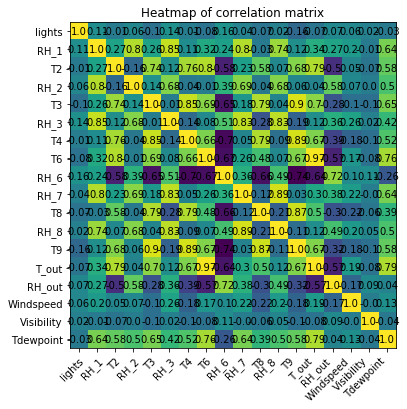

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(mc)
ax.set_title('Heatmap of correlation matrix')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
rotation_mode="anchor")
# We want to show all ticks...
ax.set_xticks(np.arange(len(feat_cols)))
ax.set_yticks(np.arange(len(feat_cols)))
# ... and label them with the respective list entries
ax.set_xticklabels(feat_cols)
ax.set_yticklabels(feat_cols)
# Loop over data dimensions and create text annotations.
for i in range(len(feat_cols)):
    for j in range(len(feat_cols)):
        text = ax.text(j, i, round(mc[i, j], 2),
        ha="center", va="center", color="black")
plt.show()

In [28]:
# Klein’s rule of thumb 
# Klein’s rule of thumb. It consists in comparing the square of the correlation between the pairs
# of predictors with the overall R2 (R² = 0.169) of the regression. 
# It is interesting because it takes into account the characteristics of the regression.

mc2 = mc**2 
print(mc2)

[[1.00000000e+00 1.26792032e-02 1.32724138e-04 3.52066960e-03
  9.80287010e-03 1.82687901e-02 9.36235703e-05 5.99779950e-03
  2.47000724e-02 1.29094892e-03 5.52041412e-03 2.59040323e-04
  2.54726755e-02 5.25260082e-03 4.95402460e-03 4.01209182e-03
  2.49186133e-04 1.04510285e-03]
 [1.26792032e-02 1.00000000e+00 7.46446712e-02 6.37042169e-01
  6.61849318e-02 7.14465837e-01 1.22390578e-02 1.01318484e-01
  5.90299605e-02 6.41931944e-01 7.55276730e-04 5.42089968e-01
  1.38997527e-02 1.17386236e-01 7.54577851e-02 4.14971854e-02
  1.98839560e-04 4.11990510e-01]
 [1.32724138e-04 7.46446712e-02 1.00000000e+00 2.58063120e-02
  5.42173811e-01 1.52517357e-02 5.83232100e-01 6.43612253e-01
  3.36585581e-01 5.38675100e-02 3.34158467e-01 4.99124147e-03
  4.58803500e-01 6.29811051e-01 2.53863659e-01 2.59086028e-03
  4.91424118e-03 3.41074655e-01]
 [3.52066960e-03 6.37042169e-01 2.58063120e-02 1.00000000e+00
  2.00889212e-02 4.63477189e-01 1.91897848e-03 4.59465511e-05
  1.50854833e-01 4.76637846e-01 1

In [29]:
#VIF criterion 
#A possible rule for multicollinearity detection is (VIF > 4). 

vif = np.linalg.inv(mc) 
print(vif)

[[ 1.24474717e+00 -3.06410957e-01  4.55271970e-02 -1.41306886e-02
   1.99263098e-02 -1.15780691e-01 -9.13632106e-01 -2.47701321e-01
  -1.97720090e-01  9.20564844e-02 -3.61854688e-01  4.68482959e-01
   1.24320737e+00  2.06188437e-01 -1.47196950e-01 -1.10381097e-01
  -8.04680609e-03 -1.51512864e-01]
 [-3.06410957e-01  1.20770488e+01 -6.15218250e+00 -9.43867971e+00
   1.22669139e+00 -3.39705284e+00  9.28658585e-01 -2.74073387e+00
  -1.93961117e-02  9.50413458e-01  1.32306702e+00 -2.93168860e-01
   1.86526699e-01  6.04973248e+00  3.36446727e+00  1.95514913e-01
  -5.97267470e-03 -3.21899400e+00]
 [ 4.55271970e-02 -6.15218250e+00  1.36578640e+01  1.12510041e+01
  -3.07946437e+00 -3.36860018e+00 -3.30438440e+00 -3.99128908e+00
  -1.20557974e+00 -1.91969594e+00 -2.22944993e+00  9.41621754e-01
  -7.20103984e-01  1.84047795e+00  1.16461341e-01 -5.59887914e-02
  -9.60834437e-02 -1.21522775e+00]
 [-1.41306886e-02 -9.43867971e+00  1.12510041e+01  1.54598125e+01
  -2.51168205e+00 -2.46132897e+00 -1.

In [22]:
#graphical representation of the influences()
## sm.graphics.influence_plot(results)
## can't seem to run this

In [23]:
#Other criteria for detecting influential points
## can't seemto run this
## print(influence.summary_frame().filter(["hat_diag","student_resid","dffits","cooks_d"]))